# Importing Necessary Libraries

In [422]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [423]:
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

# Importing dataset

In [424]:
data = pd.read_csv("winequality-red.csv")

In [425]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Describing Dataset

In [426]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Finding Null Values

In [427]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [428]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Setting the Quality as 0 and 1

In [429]:
data['quality'] = data['quality'].replace([0,1,2,3,4,5], 0)
data['quality'] = data['quality'].replace([6,7,8,9], 1)

I have used quality 0 to 5 for 0 and 6 to 9 for 1

# Checking the distribution of the target

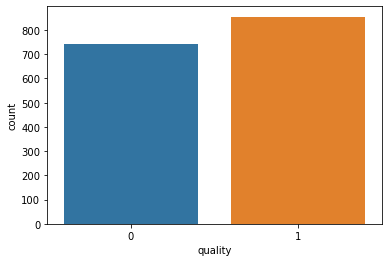

In [430]:
sns.countplot(x='quality',data=data)
plt.show()

In [431]:
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [432]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [433]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


# Scatter Plot to check the Correlation

y= data['quality']
x= data.drop(['quality'], axis =1)

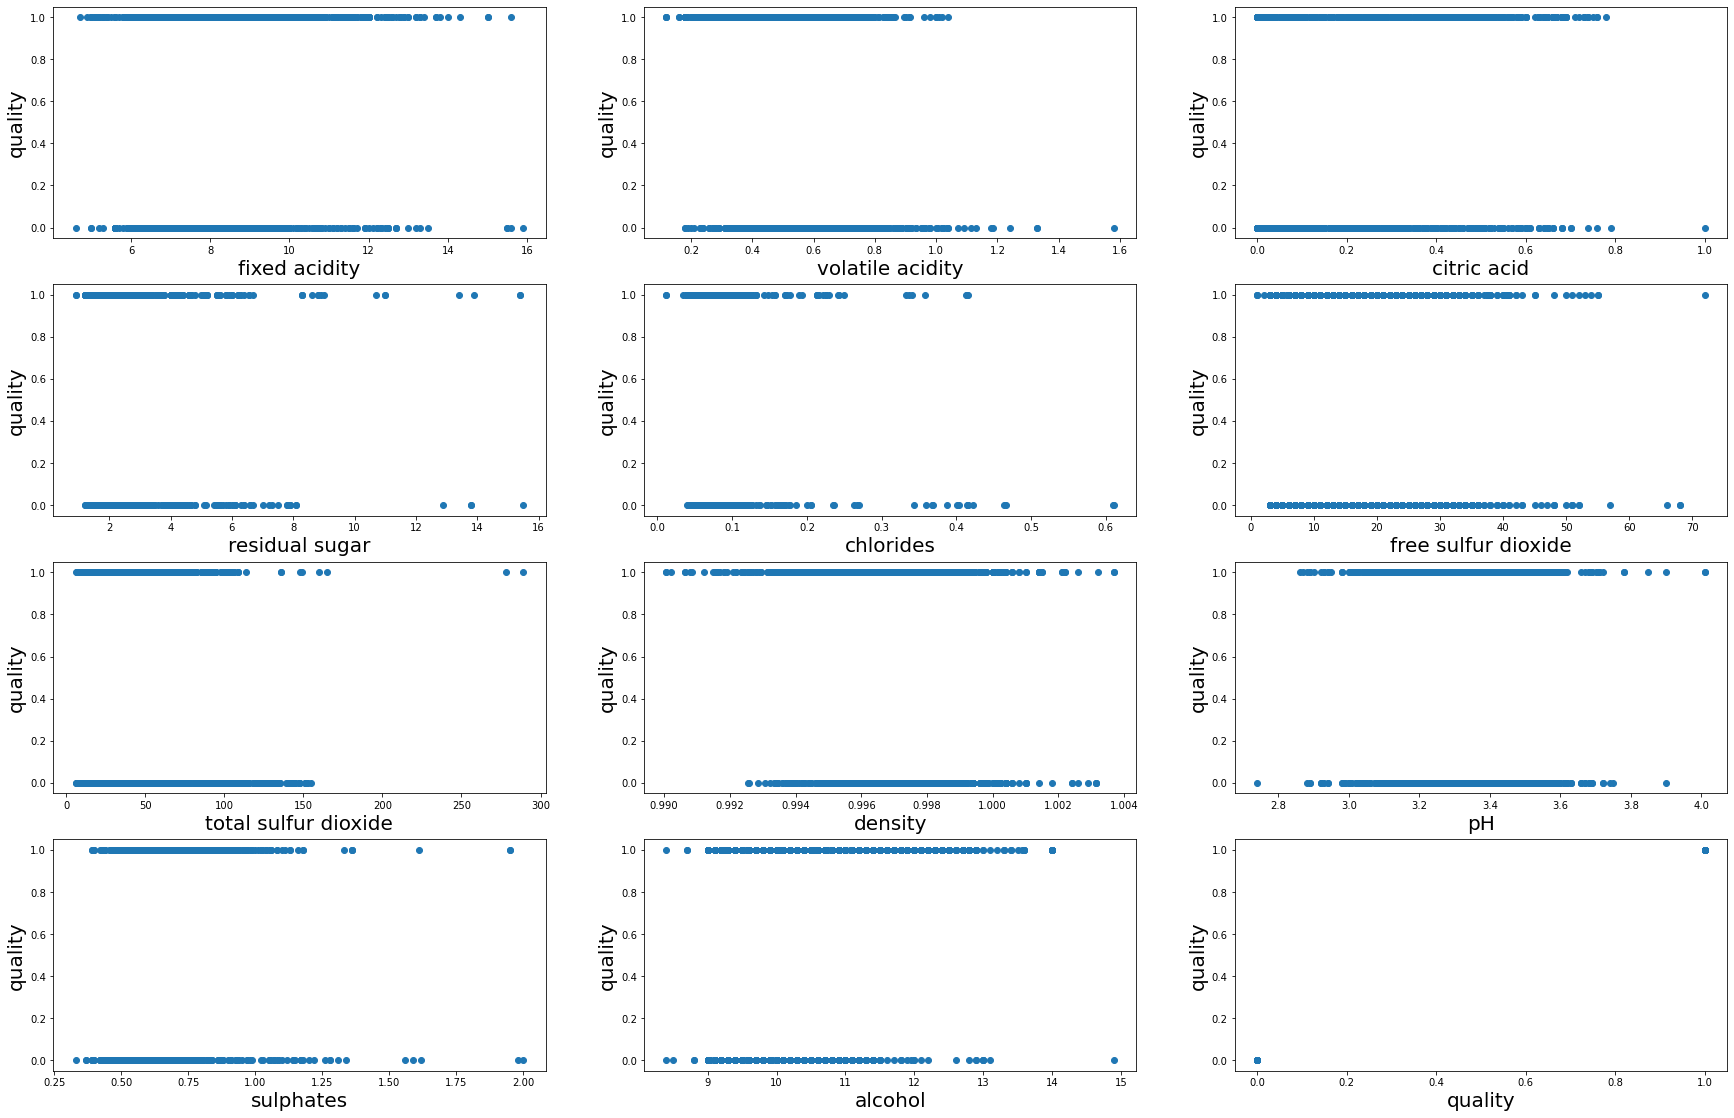

In [434]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in data:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(data[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality',fontsize=20)
    plotnumber +=1
plt.show()

In [435]:
data_corr = data.corr().abs()
data_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.095093
volatile acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.321441
citric acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.109494
free sulfur dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408,0.061757
total sulfur dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654,0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180,0.159110
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633,0.003264
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595,0.218072


# Heatmap to check the correlation between different columns

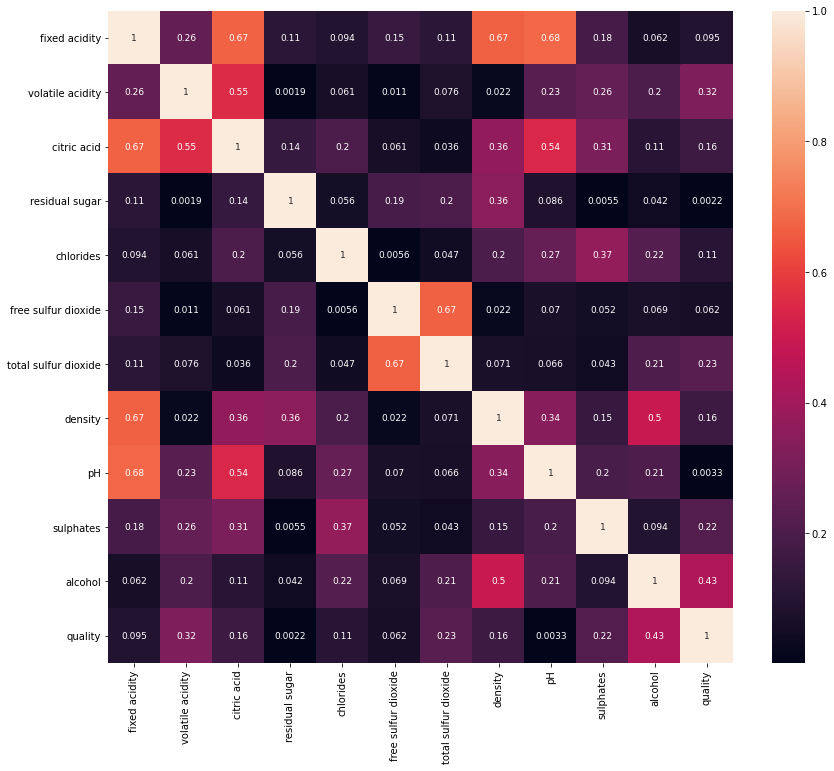

In [436]:
plt.figure(figsize=(14,12))
sns.heatmap(data_corr,annot=True, annot_kws={"size": 9})
plt.show()

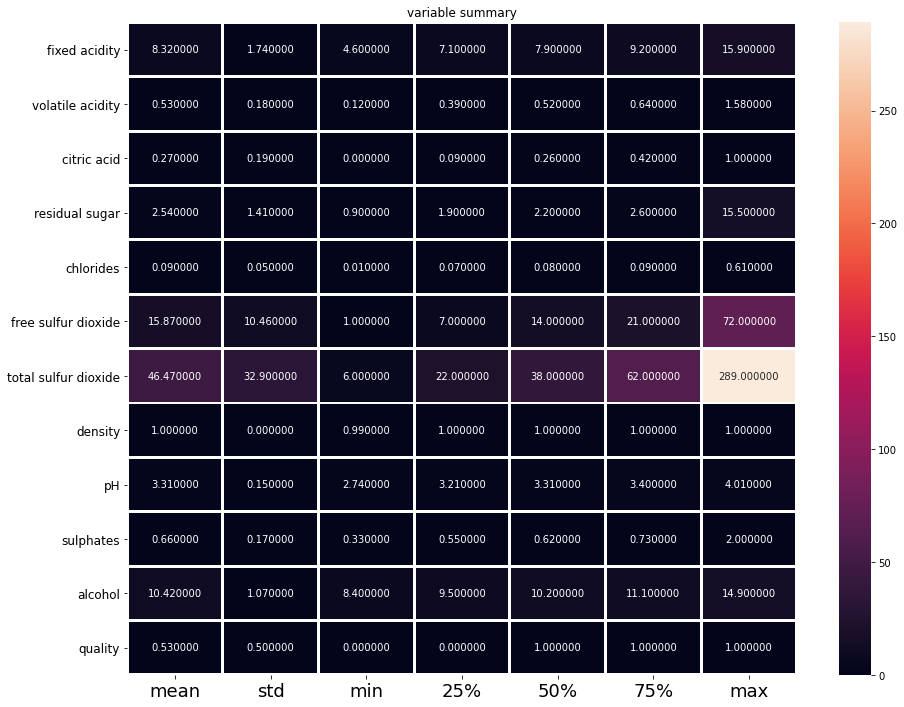

In [437]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()


# Checking th Dataset Information

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Outliers check

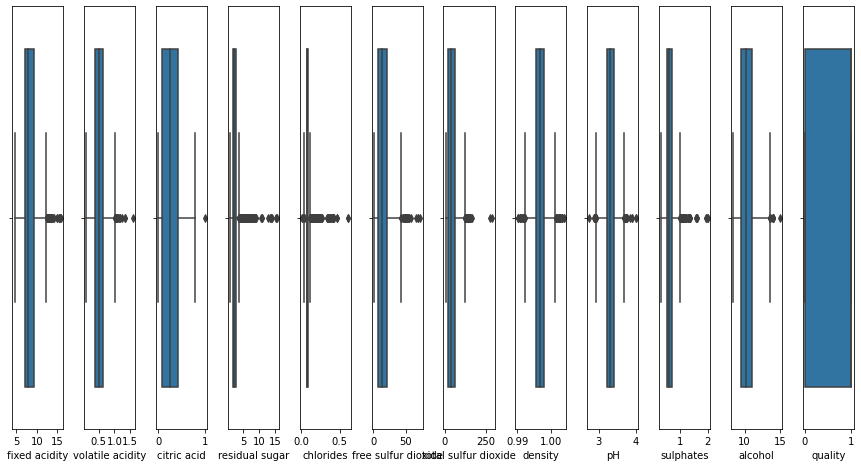

In [439]:
collist=data.columns.values
ncol =30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],orient='v')
    plt.tight_layout()
 

# Normal Distribution

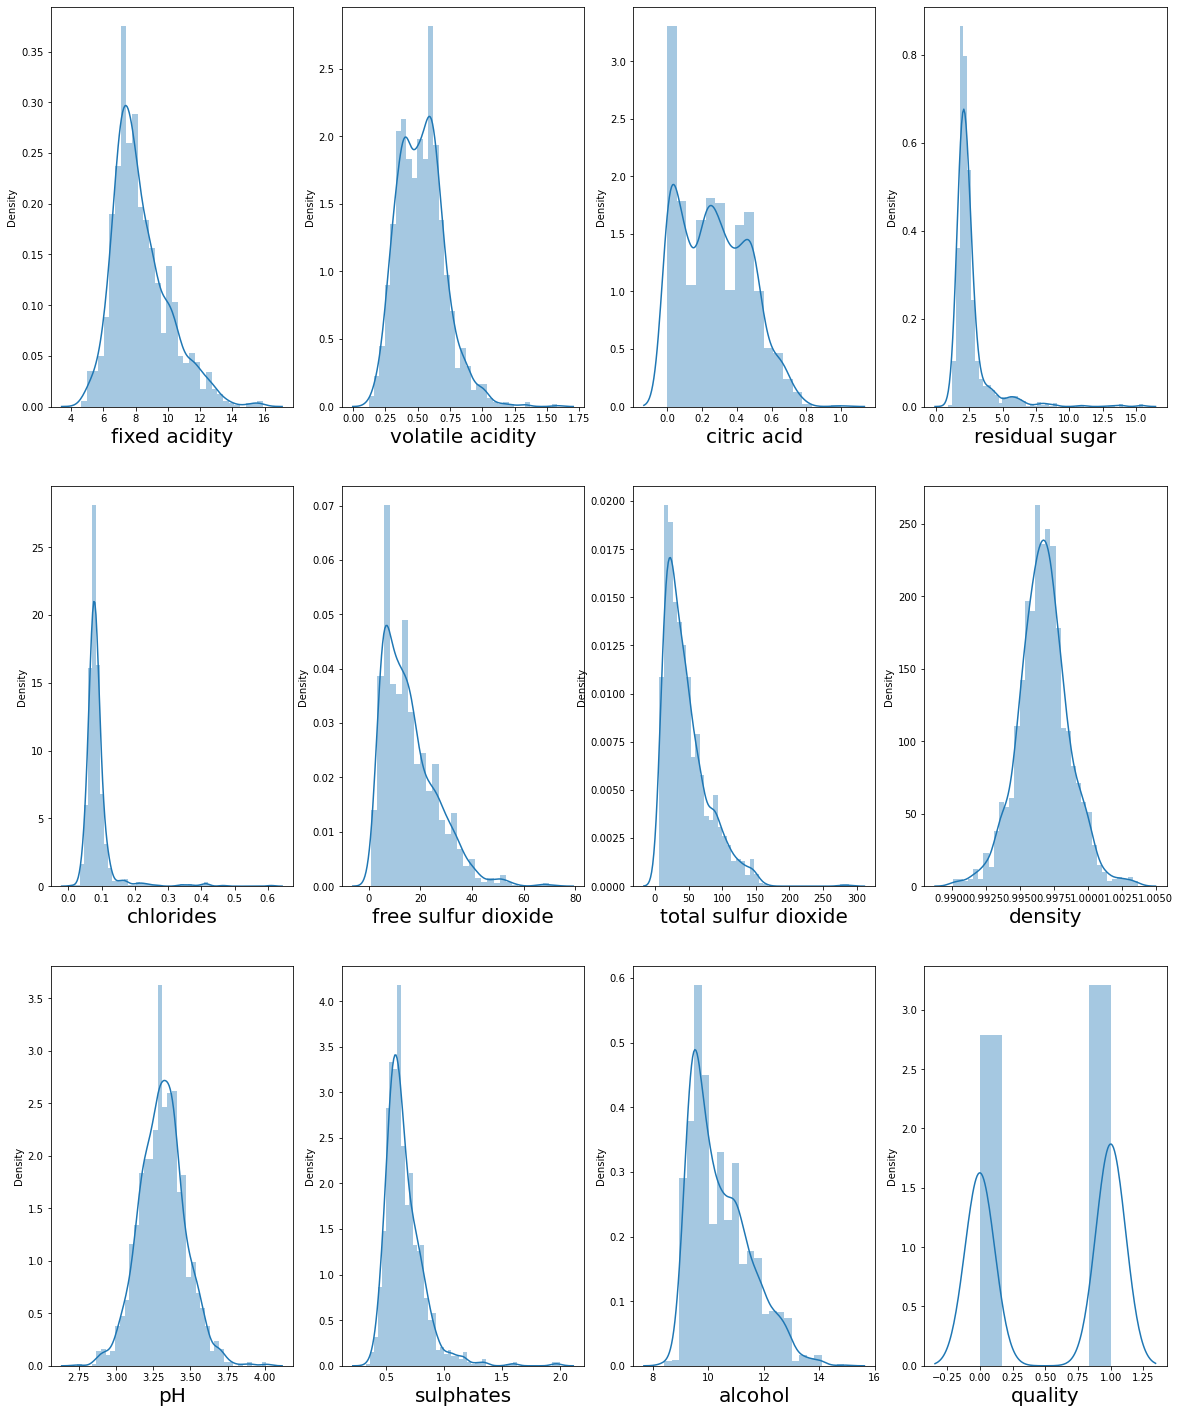

In [440]:
plt.figure(figsize=(20,25))
plotnumber =1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Diving Features and Label

In [441]:
x=data.drop("quality",axis=1)
y=data["quality"]

# Checking the Skewness

In [442]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

# Using Power Transform to reduce skewness

In [443]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x = pd.DataFrame(x_new,columns=x.columns)

In [444]:
x.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

# Checking Outliers

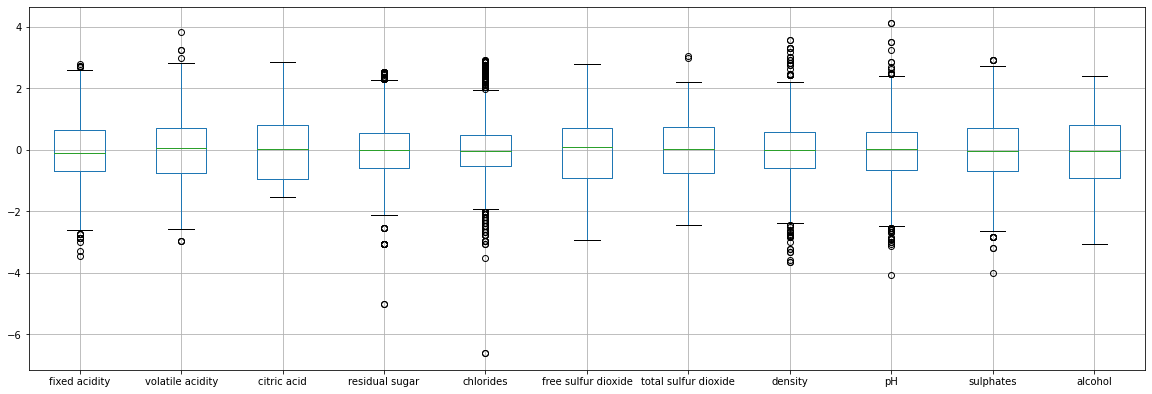

In [445]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAcc = 0
maxRs =0
for i in range(1,300):
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.25,random_state=i)
    Lr=LogisticRegression()
    Lr.fit(x_train,y_train)
    predrf = Lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc :
        maxAcc=acc
        maxRs =i
print("Best accuracy is ",maxAcc," on Random_state ",maxRs)

Best accuracy is  0.7925  on Random_state  164


# Creating Train-test split

In [447]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= .25,random_state = 164)

# Logistic Regression

In [448]:
from sklearn.linear_model import LogisticRegression


In [451]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  79.25
[[130  50]
 [ 33 187]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       180
           1       0.79      0.85      0.82       220

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



# Decision Tree Classifier

In [453]:
from sklearn.tree import DecisionTreeClassifier

In [455]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  79.0
[[136  44]
 [ 40 180]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       180
           1       0.80      0.82      0.81       220

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



# Random Forest Classifier

In [456]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  84.5
[[139  41]
 [ 21 199]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       180
           1       0.83      0.90      0.87       220

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



# SVC

In [458]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  81.0
[[135  45]
 [ 31 189]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       180
           1       0.81      0.86      0.83       220

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.81       400
weighted avg       0.81      0.81      0.81       400



# Cross Validation

In [459]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7192104231974922


In [460]:
scr = cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7254486677115988


In [461]:
scr = cross_val_score(svc,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7260736677115986


# Hyper Parameter Tuning

In [464]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [4,5,6,7,8,9,10,11],
             'criterion': ['gini','entropy']}

In [465]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}

In [466]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test)

0.855

# ROC AUC Plot

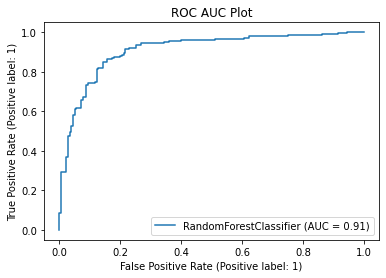

In [468]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

### Final accuracy is 86% and AUC score is 91% which is preety good.`

# Saving the model

In [469]:
import joblib
joblib.dump(GCV.best_estimator_,"Red Wine Quality Model.pkl")

['Red Wine Quality Model.pkl']